In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Parameters
beta = 5.5
sdim = 1024

In [41]:
# Set Seed
np.random.seed(117);

In [42]:
# Build power spectrum 
f = [x/sdim for x in range(1,int(sdim/2)+1,1)] + [y/sdim for y in range(-int(sdim/2),0,1)]
u = np.reshape(f, (sdim, 1))
v = np.reshape(f, (1, sdim))
powerspectrum = (u**2 + v**2)**(-beta/2)

In [43]:
# Noise and ifft
phases = np.random.normal(0, 255, size=[sdim, sdim]);
complexpattern = np.fft.ifft2(powerspectrum**0.5 * (np.cos(2*np.pi*phases)+1j*np.sin(2*np.pi*phases)))

In [44]:
# Normalize result
realpattern = np.real(complexpattern)
realpattern = (realpattern-np.amin(realpattern))/np.amax(realpattern-np.amin(realpattern))

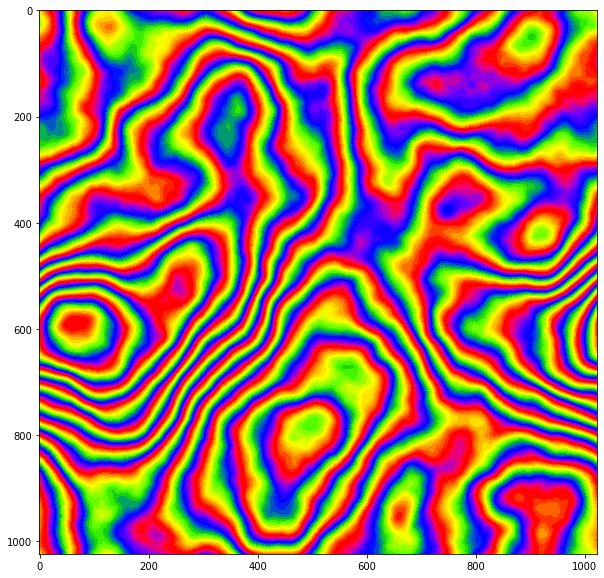

In [45]:
# Display result
plt.rcParams["figure.figsize"]=10,10
plt.imshow(realpattern, cmap='prism', vmin=0, vmax=1, aspect='auto')